In [16]:
import Pkg
Pkg.activate(".")

  Activating project at `c:\Users\Ciara Woellhof\Downloads`


In [17]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets"])

   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Manifest.toml`


In [18]:
using Images, Colors, MLDatasets

In [19]:
ENV["DATADEPS_ALWAYS_ACCEPT"] = "true"
dataset = MNIST()

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [20]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [21]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [22]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

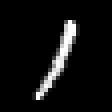

In [23]:
Gray.(dataset.features[:,:,100]')

In [24]:
# Train model to get it to be as accurate as possible, then find most important pixels, troubleshoot, etc.
# Try for arounf 75% -85% accuracy, you will never get this model to be 100 or 90% accuracy.
# 10^LinRange(-4,-2*,50) -> popular method

## BME 574 Midterm Exam (take-home)

The dataset above is the famous MNIST dataset of handwritten digits (28x28 grayscale images).
The challenge for this midterm is to find the most informative pixels for each digit from this dataset
using techniques that you have learning previously.  Here is how to start:
1. Create a set of output (label) vectors $\{y_j\}$ of length 10 that represent the labels (0-9)
here are a few examples:
$$
\begin{align}
^{"}1^{"}=\begin{bmatrix} 1\\0\\0\\ \vdots \\0 \end{bmatrix}
\end{align}
$$
$$
\begin{align}
^{"}3^{"}=\begin{bmatrix} 0\\0\\1\\ \vdots \\0 \end{bmatrix}
\end{align}
$$

2. Now let $B$ be the set of output (label) vectors

$$
\begin{align}
B = \begin{bmatrix} y_{1} & y_{2} & y_{3} & \ldots & y_{n}\end{bmatrix}
\end{align}
$$

3. Let the matrix $A$ be the corresponding reshaped (vectorized) MNIST images (one in each row)

$$
\begin{align}
A = \begin{bmatrix} x_{1} & x_{2} & x_{3} & \ldots & x_{n}\end{bmatrix}
\end{align}
$$

4. $AX = B$ maps from the image space to the label space

Your task is to use solvers for $AX=B$ that promote sparsity to rank the pixels in the MNIST dataset that are most informative for correctly labeling the digits. You will have to come up with your own heuristics or empirical rules for this. Be sure to visualize the results from X. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible. Redo the analysis with each digit individually to ﬁnd the most important pixels for each digit. Think about the interpretation of what you are doing with this $AX = B$ problem.
Hint: for testing, it may be a good idea to start with a smaller dataset (e.g. 1000 images)

In [25]:
# Goal is to figure out which pixels in 28 by 28 image are the most telling of the value of the digit
# 1 - Figure out procedure to get this thing to predict number digits 
# 2 - Use experiene in optimization and regression to determine most important region.
# Apply to test set, see how accurate your prediction was by using only your most calculated dominant pixels to predict 
# Can do by each digit, find most important pixels for each digit
# This is big data set - may be problems with memory 
# When developing technique, start with smaller set to test ~ 1000 

In [1]:
using Pkg
Pkg.add(["MLDatasets", "Flux", "LinearAlgebra", "SparseArrays", "Lasso", "Plots", "Optimisers","MLDataUtils"])
Pkg.add("Flux")
Pkg.update("Flux")


   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Manifest.toml`
    Updating registry at `C:\Users\Ciara Woellhof\.julia\registries\General.toml`
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Project.toml`
  No Changes to `C:\Users\Ciara Woellhof\Downloads\Manifest.toml`


In [2]:
using MLDatasets
using Flux
using Flux: onehotbatch, onecold, crossentropy, train!, softmax, params
using LinearAlgebra
using SparseArrays
using Lasso
using Plots
using Optimisers: ADAM,Adam
using Optimisers
using MLDataUtils
using Random

In [30]:


# Convert labels to one-hot encoded vectors

function create_label_vectors(labels)
    n = length(labels) # Get the number of labels.
    B = zeros(Float32, n, 10)  # Changed dimension order to n × 10
    for (i, label) in enumerate(labels) # Iterate over the labels with their indices.
        B[i, label + 1] = 1.0
    end
    return B
end


create_label_vectors (generic function with 1 method)

In [ ]:


# Reshape MNIST images into a matrix where each row is a flattened image

function prepare_image_matrix(images)

    return Float32.(reshape(images, :, size(images)[end]))' # Transpose to get n_samples × features , convert to float32
    
end

# Transpose the resulting matrix so that each row represents one image and each column represents a pixel.

prepare_image_matrix (generic function with 1 method)

In [ ]:

# Solve for X using iterative soft thresholding

function solve_sparse(A, B, λ; max_iter=5000, tol=1e-6)
    # A is n_samples × features
    # B is n_samples × 10
    # X will be features × 10
    X = zeros(Float32, size(A, 2), size(B, 2))
    
    # Normalize step size
    L = maximum(svdvals(A)[1:min(5, end)])^2 * 1.1
    γ = 1.0 / L # Set the learning rate
    
    for _ in 1:max_iter
        X_old = copy(X) # Save the current weights for convergence checking.
        
        # Gradient step
        grad = A' * (A * X - B)
        X = X - γ * grad
        
        # Soft thresholding
        X = sign.(X) .* max.(abs.(X) .- λ * γ, 0)
        
        # Check convergence
        if norm(X - X_old) / norm(X) < tol 
            break
        end
    end
    
    return X
    
end



solve_sparse (generic function with 1 method)

In [ ]:

# Find most important pixels for a specific digit

function find_important_pixels(X, digit_idx; threshold=0.1)

    importance = abs.(X[:, digit_idx + 1]) # Calculate the absolute value of the weights for the specified digit
    sorted_indices = sortperm(importance, rev=true) #  Sort the pixel indices by their importance in descending order.
    return sorted_indices, importance[sorted_indices]
    
end



find_important_pixels (generic function with 1 method)

In [ ]:

# Optimize lambda parameter using validation set

function optimize_lambda(train_x, train_y, val_x, val_y)
    lambda_range = 10.0 .^ range(-4, 1, length=20)
    best_accuracy = 0.0
    best_lambda = 0.0
    accuracies = []
    
    # Prepare validation data once
    val_A = prepare_image_matrix(val_x)
    
    for λ in lambda_range # Loop over each λ value in the range.
        # Prepare matrices with correct dimensions
        A = prepare_image_matrix(train_x)      # n_samples × 784
        B = create_label_vectors(train_y)      # n_samples × 10
        X = solve_sparse(A, B, λ)              # 784 × 10
        
        accuracy = test_accuracy_single_pixels(val_x, val_y, X) # Evaluate the model's accuracy on the validation set.
        push!(accuracies, accuracy)
        
        if accuracy > best_accuracy
            best_accuracy = accuracy
            best_lambda = λ
        end
    end
    
    # Plot lambda optimization results
    plot(lambda_range, accuracies, xscale=:log10,
         xlabel="Lambda", ylabel="Accuracy",
         title="Lambda Optimization Results",
         marker=:circle)
    
    return best_lambda, best_accuracy # Return the best λ value and the corresponding accuracy.
end


optimize_lambda (generic function with 1 method)

In [ ]:
# How is accuracy tested?

# Classification accuracy
# Classification accuracy is defined as the ratio of correctly predicted labels to the total number of predictions made. 
# It calculates the accuracy as the mean of the correct predictions compared to the actual labels.


# Test accuracy using only the most important pixel for each digit
function test_accuracy_single_pixels(test_x, test_y, X)
    test_A = prepare_image_matrix(test_x)
    n_test = size(test_A, 1)
    predictions = zeros(Int, n_test)
    
    # Find most important pixel for each digit
    important_pixels = Dict()
    for digit in 0:9
        indices, _ = find_important_pixels(X, digit)
        important_pixels[digit] = indices[1]  # Take only the most important pixel
    end
    
    # Make predictions using only the most important pixels
    for i in 1:n_test
        scores = zeros(10)
        for digit in 0:9
            pixel_idx = important_pixels[digit]
            pixel_value = test_A[i, pixel_idx]
            scores[digit + 1] = abs(pixel_value * X[pixel_idx, digit + 1])
        end
        predictions[i] = argmax(scores) - 1
    end
    
    return mean(predictions .== test_y)
end


test_accuracy_single_pixels

In [ ]:
# Test accuracy with variable numbers of important pixels
function test_accuracy_n_pixels(test_x, test_y, X, n_pixels)
    test_A = prepare_image_matrix(test_x)
    n_test = size(test_A, 1)
    predictions = zeros(Int, n_test)
    
    # Find n most important pixels for each digit
    important_pixels = Dict()
    for digit in 0:9
        indices, _ = find_important_pixels(X, digit)
        important_pixels[digit] = indices[1:n_pixels]
    end
    
    # Make predictions using n most important pixels
    for i in 1:n_test
        scores = zeros(10)
        for digit in 0:9
            pixel_indices = important_pixels[digit]
            pixel_values = test_A[i, pixel_indices]
            scores[digit + 1] = sum(abs.(pixel_values .* X[pixel_indices, digit + 1]))
        end
        predictions[i] = argmax(scores) - 1
    end
    
    return mean(predictions .== test_y)
end


test_accuracy_n_pixels

In [ ]:

# Load MNIST data
train_x, train_y = MNIST.traindata(Float32)
test_x, test_y = MNIST.testdata(Float32)


┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\Ciara Woellhof\.julia\packages\MLDatasets\0MkOE\src\datasets\vision\mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\Ciara Woellhof\.julia\packages\MLDatasets\0MkOE\src\datasets\vision\mnist.jl:195


(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [42]:

# Use smaller subset for testing
n_train = 20000
n_test = 5000
train_x = train_x[:,:,1:n_train]
train_y = train_y[1:n_train]
test_x = test_x[:,:,1:n_test]
test_y = test_y[1:n_test]


5000-element Vector{Int64}:
 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
 0
 6
 9
 ⋮
 9
 9
 3
 7
 0
 7
 7
 2
 3
 2
 4
 0

In [43]:

# Split training data into train and validation
n_val = 5000
val_indices = randperm(n_train)[1:n_val]
train_indices = setdiff(1:n_train, val_indices)


15000-element Vector{Int64}:
     1
     2
     3
     4
     5
     6
     7
     8
    10
    11
    12
    13
    15
     ⋮
 19982
 19984
 19985
 19986
 19987
 19991
 19992
 19994
 19996
 19997
 19998
 19999

In [44]:

# Prepare matrices with correct dimensions
A = prepare_image_matrix(train_x[:,:,train_indices])  # n_samples × 784
B = create_label_vectors(train_y[train_indices])      # n_samples × 10


15000×10 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0

In [45]:

# Normalize data
A = A ./ maximum(A)


15000×784 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [ ]:

# Optimize lambda
println("Optimizing lambda parameter...")
best_lambda, best_val_accuracy = optimize_lambda(
    train_x[:,:,train_indices],
    train_y[train_indices],
    train_x[:,:,val_indices],
    train_y[val_indices]
)
println("Best lambda: $best_lambda (Validation accuracy: $(round(best_val_accuracy * 100, digits=2))%)")


In [16]:

# Solve for X with optimal lambda
X = solve_sparse(A, B, best_lambda)  # 784 × 10


784×10 Matrix{Float64}:
  0.0          0.0   0.0          0.0          …   0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0          …   0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0          …   0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  0.0          0.0   0.0          0.0              0.0           0.0
  ⋮                                            ⋱                
 -0.00100271  

In [17]:

# Test accuracy using single most important pixel
single_pixel_accuracy = test_accuracy_single_pixels(test_x, test_y, X)
println("\nAccuracy using single most important pixel per digit: $(round(single_pixel_accuracy * 100, digits=2))%")



Accuracy using single most important pixel per digit: 24.8%


In [18]:

# Test accuracy with different numbers of pixels
pixel_counts = [1, 5, 10, 20, 50, 100]
accuracies = []
println("\nTesting accuracy with different numbers of pixels:")
for n_pixels in pixel_counts
    accuracy = test_accuracy_n_pixels(test_x, test_y, X, n_pixels)
    push!(accuracies, accuracy)
    println("$n_pixels pixels: $(round(accuracy * 100, digits=2))%")
end



Testing accuracy with different numbers of pixels:
1 pixels: 24.8%
5 pixels: 25.78%
10 pixels: 25.34%
20 pixels: 22.78%
50 pixels: 23.0%
100 pixels: 24.48%


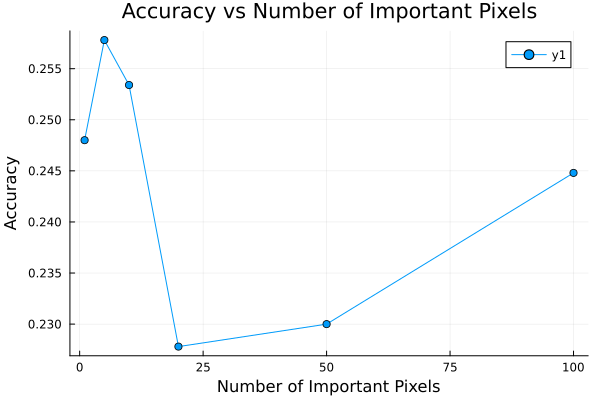

In [ ]:

# Plot accuracy vs number of pixels
plot(pixel_counts, accuracies,
     xlabel="Number of Important Pixels",
     ylabel="Accuracy",
     title="Accuracy vs Number of Important Pixels",
     marker=:circle)


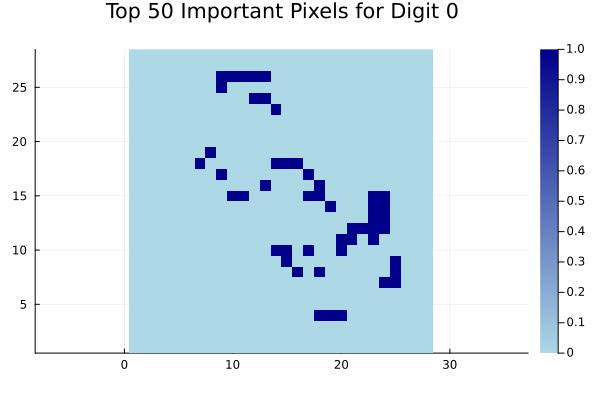

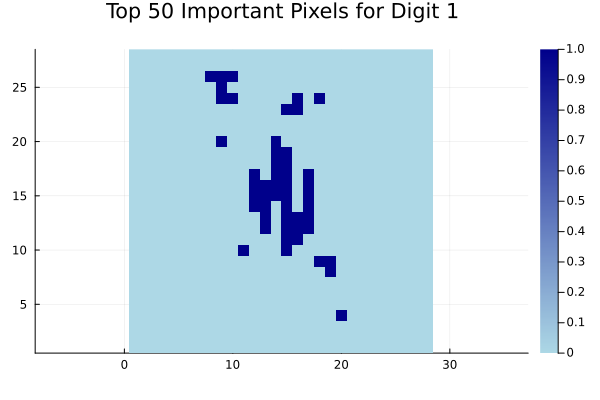

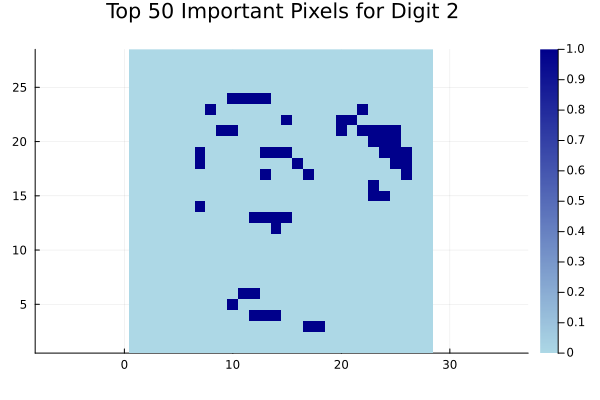

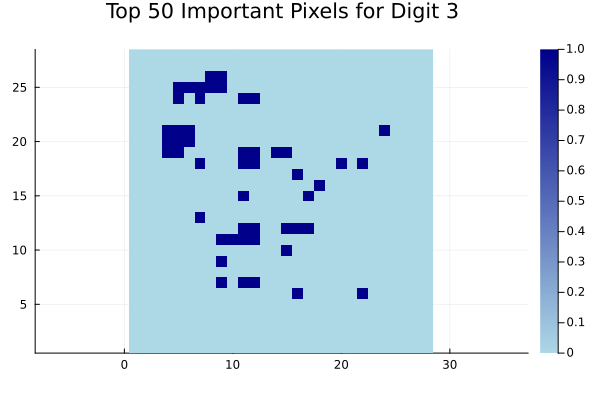

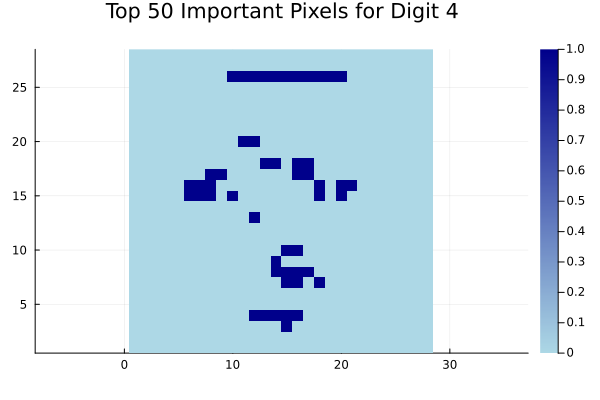

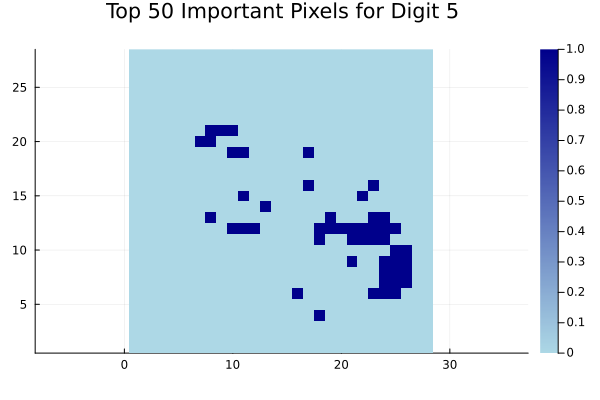

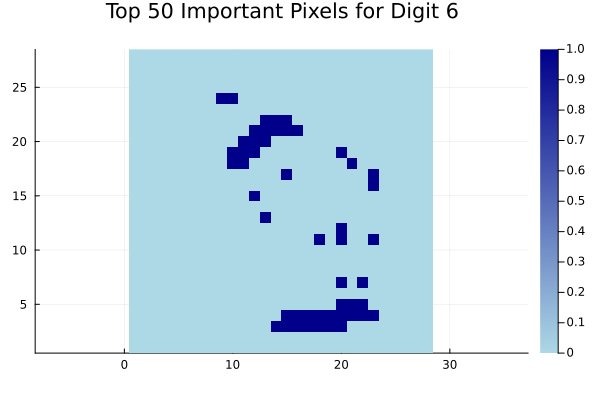

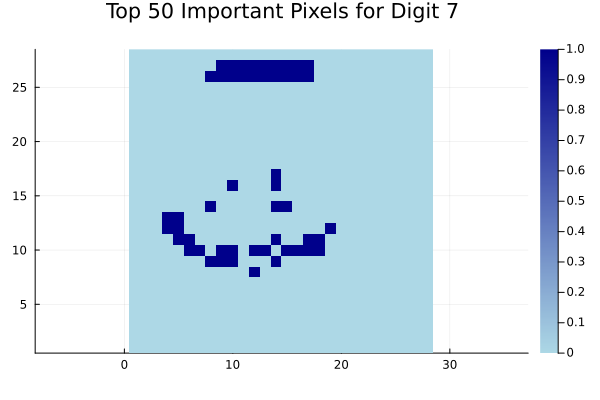

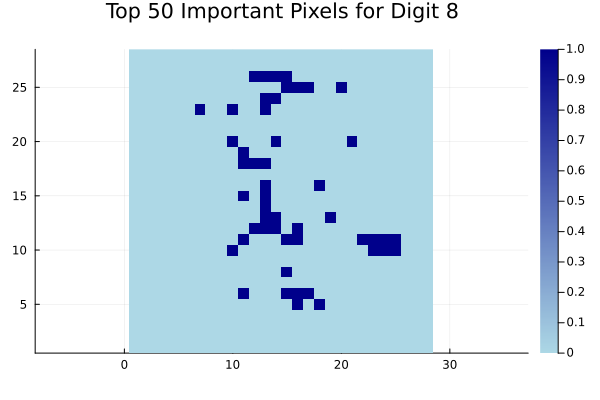

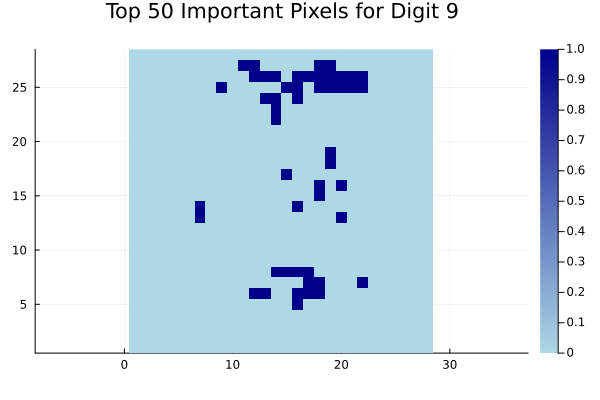

In [ ]:

# Visualize important pixels for each digit
for digit in 0:9
    importance_map = zeros(28, 28)
    indices, importance = find_important_pixels(X, digit)
    top_pixels = indices[1:50]  # Show top 50 pixels
    
    for pixel in top_pixels
        i, j = fldmod1(pixel, 28)
        importance_map[i, j] = 1
    end
    
    display(heatmap(importance_map,
            title="50 Most Important Pixels for Digit $digit",
            color=:greens,
            aspect_ratio=1))
end

In [ ]:
# To make more accurate : 

# 1 - Use more training data
# 2 - Increase range for lambda
# 3 - increase the number of iterations
# 4 - and more ....